# CCR Regenartion Catalyst Project RGB Model

In [151]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [152]:
# Loading data
data = pd.read_excel(r'C:\Users\z_ref_analyst1\Desktop\RGB_regeneration\RGB_data\train_may.xlsx')
#data_test = pd.read_excel(r'C:\Users\z_ref_analyst1\Desktop\CCR_RGB\rgb_test.xlsx')

Exploring data

In [153]:
data.head()

,Unnamed: 0,R,G,B,files,output
0,0,148.195652,150.419165,148.077968,1,0.08
1,27,147.169132,149.237379,146.977485,2,0.08
2,38,149.736829,151.612940,149.635226,3,0.08
3,49,148.598425,150.687597,148.425753,4,0.08
4,60,138.166109,140.574556,145.462008,5,0.04


In [154]:
data.drop(columns = ['Unnamed: 0', 'files'], axis = 1, inplace = True)

In [155]:
#data_test.head()

In [156]:
#data.drop('Unnamed: 1',axis=1, inplace=True)

In [157]:
len(data)

115

C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_17040\3667092856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins = 10)


<AxesSubplot:ylabel='Density'>

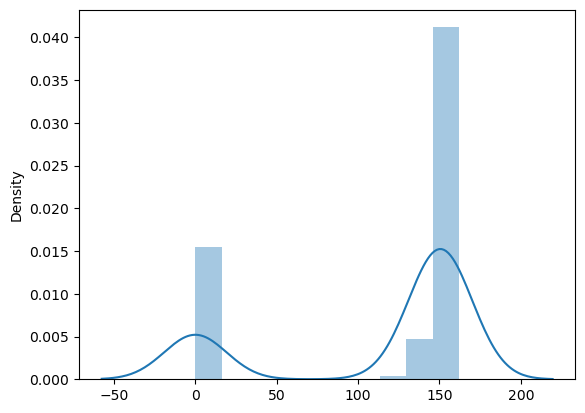

In [158]:
sns.distplot(data, bins = 10)

<AxesSubplot:>

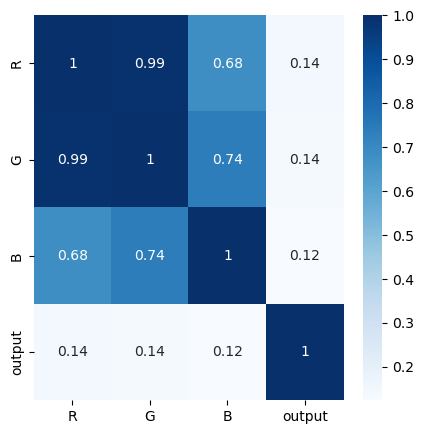

In [159]:
#data_plot = data.drop('files', axis=1)
corrmat = data.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corrmat, annot = True, cmap = 'Blues')

In [160]:
#data_test.head()

In [161]:
#data_test.drop(['Unnamed: 0', 'files'], axis = 1, inplace=True)

In [162]:
#len(data_test)

In [163]:
#data_test.head()

In [164]:
#data.drop('files', axis = 1, inplace=True)

### Using Simple Linear Regression Model

In [165]:
model_lr = LinearRegression() # Linear Regression model
scaler = StandardScaler() # Standard scalar
#normalizer = MinMaxScaler()

In [166]:
# Creatig dependent and independent variables
X = data.drop(['output'], axis = 1)
y = data['output']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

# Normalizing Data
#X_train = normalizer.fit_transform(X_train) 
#X_test = normalizer.transform(X_test)

# Standardizing Data
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [167]:
# Training Model
lr_reg = model_lr.fit(X_train, y_train)

In [168]:
# Predecting values
pred_lr = lr_reg.predict(X_test)
pred_lr # Predicted values

array([0.08182493, 0.08477435, 0.08432225, 0.0844354 , 0.08408638,
       0.08402793, 0.08066661, 0.0850785 , 0.083395  , 0.08521395,
       0.08416597, 0.0815414 , 0.08362221, 0.08914029, 0.08288439,
       0.08326986, 0.0842732 , 0.08500023, 0.08251031, 0.0846797 ,
       0.08554093, 0.08256071, 0.08480716, 0.08315003, 0.08164958,
       0.08525814, 0.08115892, 0.08488621, 0.0844382 , 0.0859496 ,
       0.08404283, 0.08103798, 0.08498439, 0.0808995 , 0.08417952])

In [169]:
len(X_train)

80

In [170]:
len(y_train)

80

In [171]:
model_lr = LinearRegression() # Linear Regression model
scaler = StandardScaler() # Standard scalar
normalizer = MinMaxScaler()

#Feature scaling is one of the most important data preprocessing step in machine learning. 
# Algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled.
# Normalization or Min-Max Scaling:
# Normalization or Min-Max Scaling is used to transform features to be on a similar scale. The new point is calculated as: X_new = (X - X_min)/(X_max - X_min)
# This scales the range to [0, 1] or sometimes [-1, 1]. 
# Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional unit hypercube.
# Normalization is useful when there are no outliers as it cannot cope up with them. 
# Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.


# Standardization or Z-Score Normalization:
# Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.
# X_new = (X - mean)/Std

# Standardization can be helpful in cases where the data follows a Gaussian distribution. 
# However, this does not have to be necessarily true. 
# Geometrically speaking, it translates the data to the mean vector of original data to the origin and squishes or expands the points if std is 1 respectively. 
# We can see that we are just changing mean and standard deviation to a standard normal distribution which is still normal thus the shape of the distribution is not affected.

# Standardization does not get affected by outliers because there is no predefined range of transformed features.


#Difference between Normalization and Standardization

# Sr.NO.	# Normalization	                                                                       # Standardization
# 1.	# Minimum and maximum value of features are used                                           # for scaling Mean and standard deviation is used for scaling.
# 2.	# It is used when features are of different scales.  	                               # It is used when we want to ensure zero mean and unit standard deviation.
# 3.	# Scales values between [0, 1] or [-1, 1].	                                         # It is not bounded to a certain range.
# 4.	# It is really affected by outliers.	                                                   # It is much less affected by outliers.
# 5.	# Scikit-Learn provides a transformer called MinMaxScaler for Normalization.	           # Scikit-Learn provides a transformer called StandardScaler for standardization.
# 6.	# This transformation squishes the n-dimensional data into an n-dimensional unit hypercube.# It translates the data to the mean vector of original data to the origin and squishes or expands.
# 7.	# It is useful when we don’t know about the distribution	                               # It is useful when the feature distribution is Normal or Gaussian.
# 8.	# It is a often called as Scaling Normalization	                                         # It is a often called as Z-Score Normalization.

In [172]:
# Creatig dependent and independent variables
X = data.drop(['output'], axis = 1)
y = data['output']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)

# Standardizing Data
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

# Normalizing data
#X_train = normalizer.fit_transform(X_train) 
#X_test = normalizer.transform(X_test)

# Training Model
lr_reg = model_lr.fit(X_train, y_train)

In [173]:
# Predecting values on training dataset
pred_lr_tr = lr_reg.predict(X_test)
pred_lr_tr # Predicted values
# Predecting values on test_dataset
#X_test_new = data_test.drop(['Output'], axis = 1)
#X_test_new_scaled = scaler.transform(X_test_new) # Standardizing data
#X_test_new_scaled = normalizer.transform(X_test_new)
#pred_lr_ts = lr_reg.predict(X_test_new_scaled) # Predecting output values
#y_actual = data_test['Output']

array([0.08710403, 0.08119196, 0.08474864, 0.08760821, 0.08388091,
       0.08854157, 0.07935123, 0.08810834, 0.08648089, 0.08438542,
       0.08171275, 0.08428545])

In [174]:
len(X_train), len(y_train)

(103, 103)

In [175]:
# R2_score on training dataset
#r2score_lr_ts = r2_score( y_actual, pred_lr_ts)
# R2_score on training dataset
r2score_lr_tr = r2_score(y_test, pred_lr_tr)
print('R2 Score of training dataset:', r2score_lr_tr, '\n', 'R2 Score of testing dataset:')

R2 Score of training dataset: -0.1042380583697482 
 R2 Score of testing dataset:


In [176]:
# Calculating Root mean square error on training dataset
mse_tr = mean_squared_error(y_test, pred_lr_tr)
rmse_tr =np.sqrt(mse_tr)
# Calculating Root mean square error on test dataset
#mse_ts = mean_squared_error(pred_lr_ts, y_actual)
#rmse_ts =np.sqrt(mse_ts)
#print('Test RMSE:', rmse_ts, '\n' , 'Training RMSE:', rmse_tr)
rmse_tr

0.03840075399148565

In [177]:
# Predecting values on test_dataset
#X_test_new = data_test.drop(['Output'], axis = 1)
#X_test_new_scaled = normalizer.transform(X_test_new) # Normalizing data
#X_test_new_scaled = scaler.transform(X_test_new) # Standardizing data
#pred_lr = lr_reg.predict(X_test_new_scaled) # Predecting output values
#y_actual = data_test['Output']


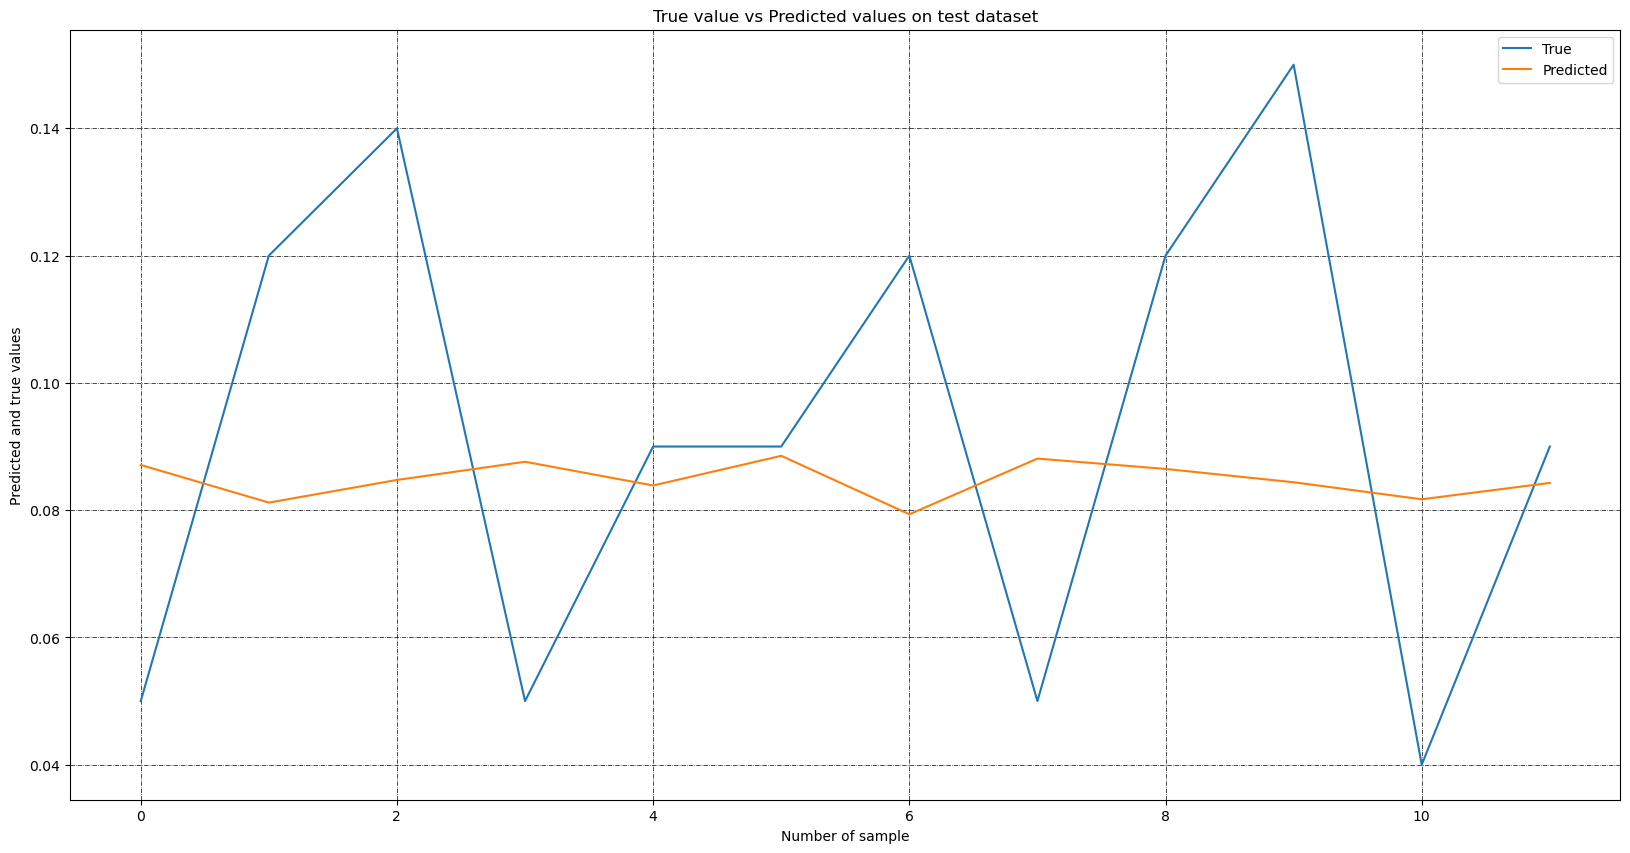

In [178]:
plt.figure(figsize=(20, 10))
plt.title('True value vs Predicted values on test dataset')
plt.xlabel('Number of sample')
plt.ylabel('Predicted and true values')
plt.plot(np.array(y_test))
plt.plot(pred_lr_tr)
plt.grid(True, color = "black", linewidth = "0.5", linestyle = "-.")
plt.legend(['True', 'Predicted'], loc = 1)
plt.show()

In [179]:
# Calculating Root mean square error on test dataset
#mse = mean_squared_error(pred_lr, y_actual)
#rmse =np.sqrt(mse)
#rmse

In [180]:
# R2_score on testing dataset
#r2score_lr = r2_score( y_actual, pred_lr)
#r2score_lr

### Using Random Forest

In [181]:
model_rf = RandomForestRegressor() # Random Forest Regressor Model
rf_reg = model_rf.fit(X_train, y_train) # Training Model
pred_rf_val = rf_reg.predict(X_test) # Predecting Output
#pred_rf_test = rf_reg.predict(X_test_new_scaled) # Predecting Output


In [182]:
# Calculating Root mean square error
mse_tr = mean_squared_error(y_test, pred_rf_val)
rmse_tr =np.sqrt(mse_tr)

# Calculating Root mean square error
#mse_ts = mean_squared_error(y_actual, pred_rf_test)
#rmse_ts =np.sqrt(mse_ts)
print('Training RMSE:', rmse_tr)

Training RMSE: 0.029054173538409233


In [183]:
# R2_score on training dataset
r2score_lr_tr = r2_score( y_test, pred_rf_val)

# R2_score on test dataset
#r2score_lr_ts = r2_score( y_actual, pred_rf_test)

print('R2 Score of training dataset:', r2score_lr_tr)

R2 Score of training dataset: 0.36787893915756664


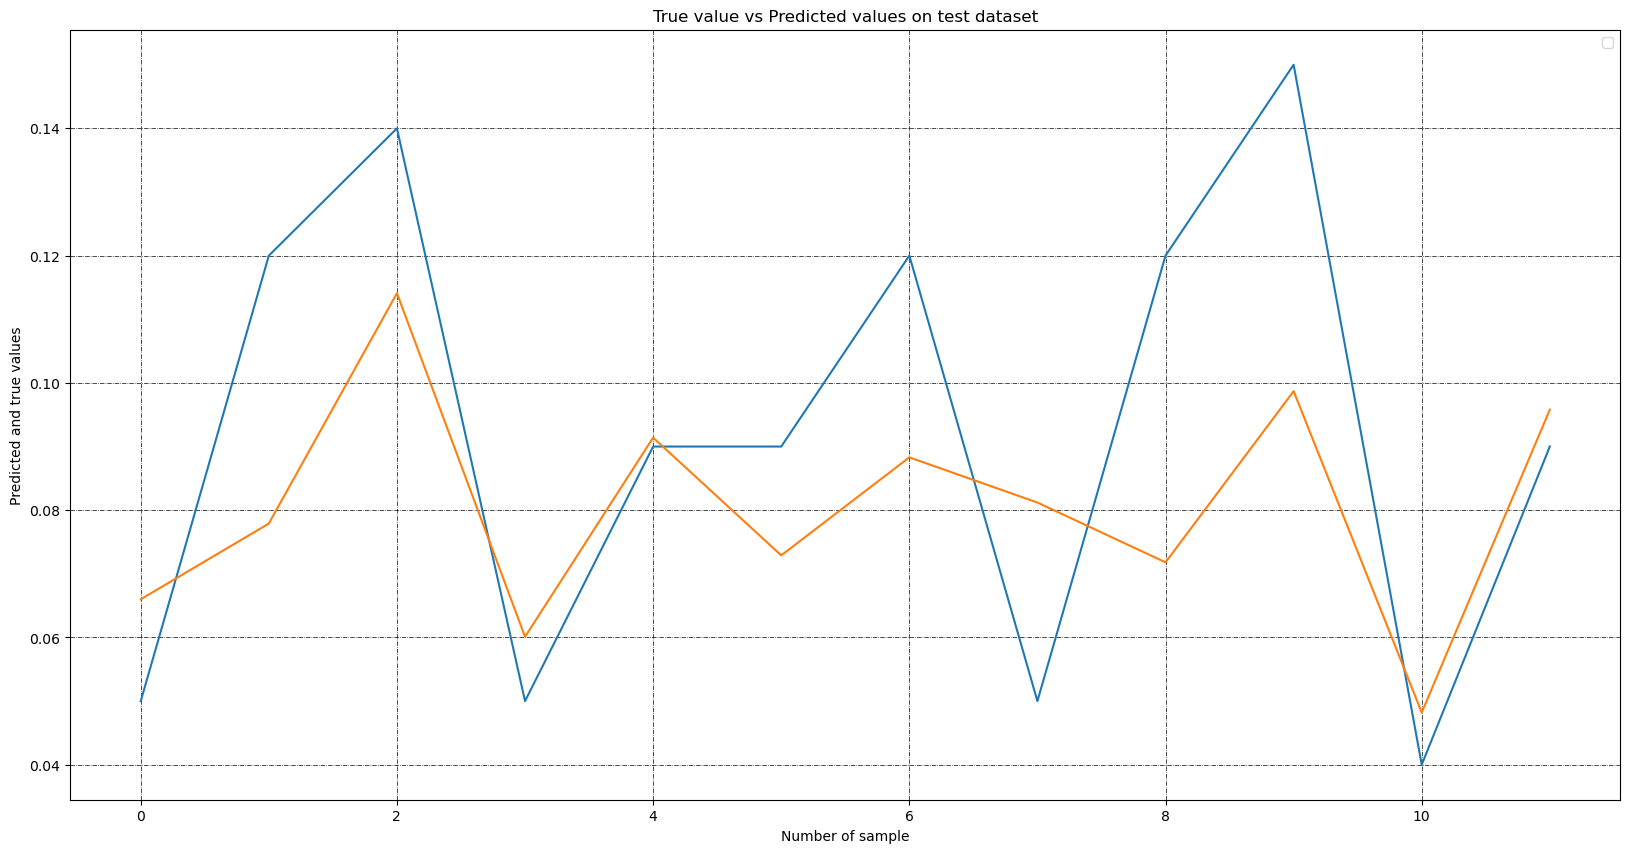

In [184]:
plt.figure(figsize=(20, 10))
plt.title('True value vs Predicted values on test dataset')
plt.xlabel('Number of sample')
plt.ylabel('Predicted and true values')
plt.grid(True, color = "black", linewidth = "0.5", linestyle = "-.")
plt.legend(['True', 'Predicted'], loc = 1)
plt.plot(np.array(y_test))
plt.plot(pred_rf_val)

plt.show()

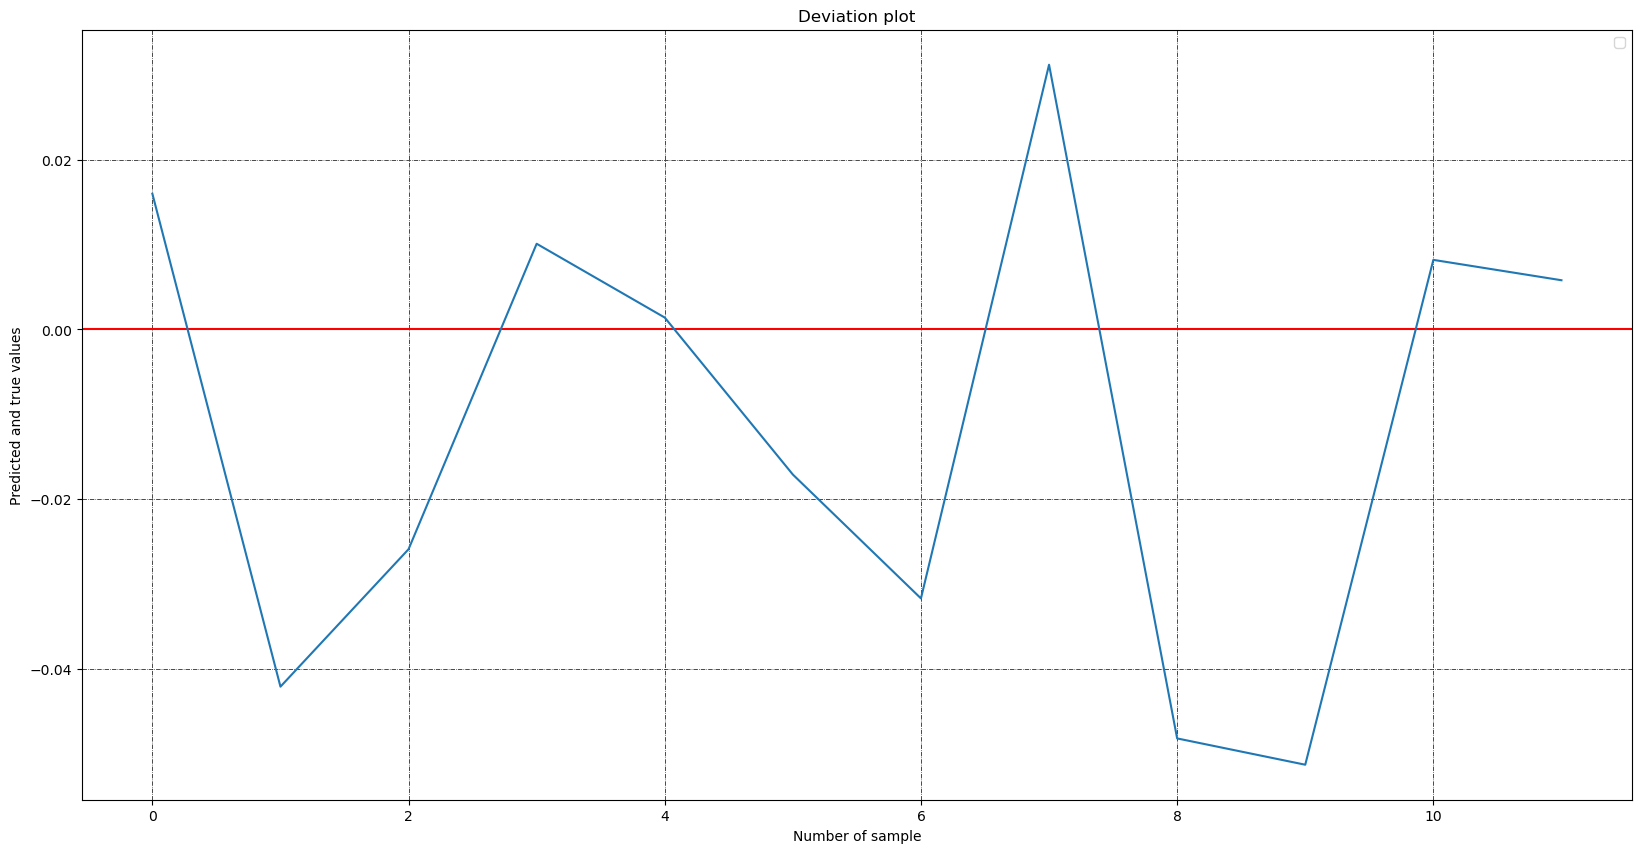

In [185]:
plt.figure(figsize=(20, 10))
plt.title('Deviation plot')
plt.xlabel('Number of sample')
plt.ylabel('Predicted and true values')
plt.grid(True, color = "black", linewidth = "0.5", linestyle = "-.")
plt.legend(['True', 'Predicted'], loc = 1)

plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.plot(pred_rf_val-np.array(y_test))
plt.show()

In [186]:
len(y_test)

12

In [187]:
accuracy = (pred_rf_val / y_test) * 100
np.sum(accuracy) / 12

97.47777777777776